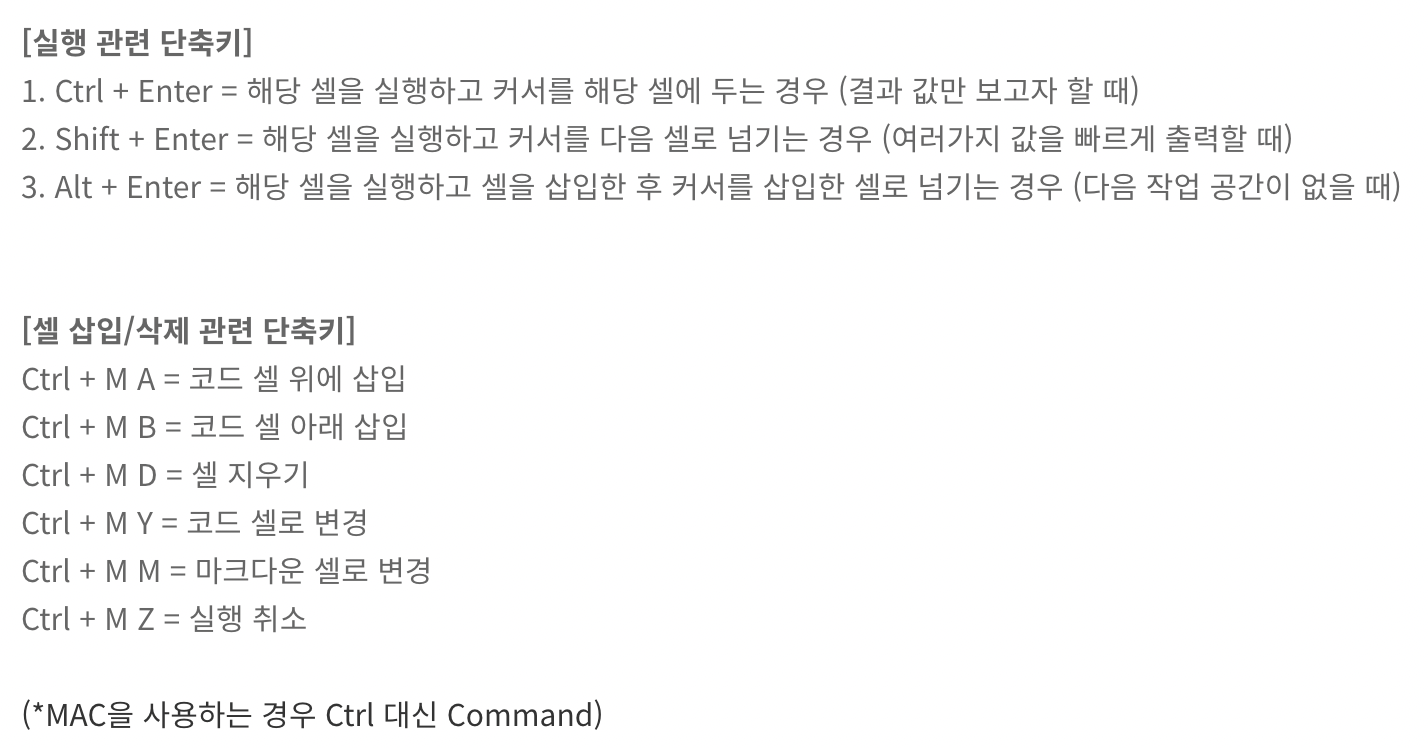

## 패키지 설치

In [1]:
# 필요라이브러리 로드
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 마이너스 기호 출력
plt.rc('axes', unicode_minus=False)

# 열 모두 표시
pd.set_option('display.max_columns', None)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 탐색적 데이터 분석(EDA_Exploratory_Data_Analysis)

In [5]:
# 데이터 로드
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bus_rush_hour/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bus_rush_hour/test.csv')
bts = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bus_rush_hour/bus_bts.csv')
jeju_life = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bus_rush_hour/jeju_financial_life_data.csv')
weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bus_rush_hour/weather.csv', encoding='cp949')
rain = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bus_rush_hour/rain.csv', encoding='utf-8')

In [6]:
# 학습 데이터 상위 5줄 출력
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
# 학습 데이터 정보 출력. 결측치 없음
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             415423 non-null  int64  
 1   date           415423 non-null  object 
 2   bus_route_id   415423 non-null  int64  
 3   in_out         415423 non-null  object 
 4   station_code   415423 non-null  int64  
 5   station_name   415423 non-null  object 
 6   latitude       415423 non-null  float64
 7   longitude      415423 non-null  float64
 8   6~7_ride       415423 non-null  float64
 9   7~8_ride       415423 non-null  float64
 10  8~9_ride       415423 non-null  float64
 11  9~10_ride      415423 non-null  float64
 12  10~11_ride     415423 non-null  float64
 13  11~12_ride     415423 non-null  float64
 14  6~7_takeoff    415423 non-null  float64
 15  7~8_takeoff    415423 non-null  float64
 16  8~9_takeoff    415423 non-null  float64
 17  9~10_takeoff   415423 non-nul

In [8]:
# bus_bts 데이터 상위 5줄 출력
# bus route id 변수를 기준으로 학습 데이터와 병합(merge)하여 다양 한방면으로 분석 가능
bts.head()

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1


In [9]:
# bus_bts 데이터 정보 출력
# getoff 결측치는 하차 태그 안했을시 발생
bts.info(null_counts=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409414 entries, 0 to 2409413
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   user_card_id         2409414 non-null  float64
 1   bus_route_id         2409414 non-null  int64  
 2   vhc_id               2409414 non-null  int64  
 3   geton_date           2409414 non-null  object 
 4   geton_time           2409414 non-null  object 
 5   geton_station_code   2409414 non-null  int64  
 6   geton_station_name   2409365 non-null  object 
 7   getoff_date          1513678 non-null  object 
 8   getoff_time          1513678 non-null  object 
 9   getoff_station_code  1513678 non-null  float64
 10  getoff_station_name  1513639 non-null  object 
 11  user_category        2409414 non-null  int64  
 12  user_count           2409414 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 239.0+ MB


In [10]:
# jeju_financial_life_data 데이터 상위 5줄 출력
jeju_life.head()

,zip_cd,year_month,x_axis,y_axis,sex,age,job_majorc,job_smallc,job_public,job_profession,job_self,job_none,job_other,avg_income,med_income,avg_spend,avg_foreign_spend,avg_debt,avg_debt_credit,avg_debt_noneb,avg_debt_mortgage,avg_debt_deposit,avg_debt_collateral,avg_credit_rat,medium_resid_rat,large_resid_rat,vehicle_own_rat
0,63299,201902,126.565889,33.513210,1,54,0.0,0.166667,0.000000,0.000000,0.166667,0.500000,0.166667,37188000,33000000,2611619,0,24285196,11419148,8863595,55550000,0,55550000,5,-999999.0,-999999.0,0.000000
1,63560,201902,126.497121,33.247225,1,59,0.0,0.125000,0.000000,0.000000,0.375000,0.500000,0.000000,35378000,32000000,1987726,0,108571077,25896955,13317443,0,200000000,74421721,4,-999999.0,-999999.0,0.000000
2,63560,201902,126.497121,33.247225,2,49,0.0,0.250000,0.000000,0.000000,0.125000,0.625000,0.000000,32119000,34000000,3529667,172405,26424335,12015311,12015311,40833359,0,40833359,2,-999999.0,-999999.0,0.000000
3,63560,201902,126.497121,33.247225,1,54,0.0,0.181818,0.090909,0.090909,0.363636,0.272727,0.000000,64746000,68200000,4868477,12046,647716901,39952556,21558153,36697792,0,706300496,4,-999999.0,-999999.0,0.166667
4,63560,201902,126.497121,33.247225,1,49,0.0,0.250000,0.000000,0.000000,0.250000,0.500000,0.000000,29578000,29700000,5209689,0,248232725,35712501,5568751,0,0,626810674,5,-999999.0,-999999.0,0.000000


In [11]:
# jeju_financial_life_data 데이터 정보 출력
jeju_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10422 entries, 0 to 10421
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zip_cd               10422 non-null  int64  
 1   year_month           10422 non-null  int64  
 2   x_axis               10422 non-null  float64
 3   y_axis               10422 non-null  float64
 4   sex                  10422 non-null  int64  
 5   age                  10422 non-null  int64  
 6   job_majorc           10422 non-null  float64
 7   job_smallc           10422 non-null  float64
 8   job_public           10422 non-null  float64
 9   job_profession       10422 non-null  float64
 10  job_self             10422 non-null  float64
 11  job_none             10422 non-null  float64
 12  job_other            10422 non-null  float64
 13  avg_income           10422 non-null  int64  
 14  med_income           10422 non-null  int64  
 15  avg_spend            10422 non-null 

In [12]:
# weather 데이터 상위 5줄 출력
weather.head()

,날짜,현재일기,현재기온,체감온도,일강수
0,2019-09-01,흐림,26.2,75.0,0
1,2019-09-02,비 끝남,22.5,72.0,25.7
2,2019-09-03,흐림,25.4,77.0,12.1
3,2019-09-04,약한비단속,24.2,75.0,34.3
4,2019-09-05,구름많음,27.6,79.0,0.1


In [13]:
# weather 데이터 정보 출력
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      46 non-null     object 
 1   현재일기    46 non-null     object 
 2   현재기온    46 non-null     float64
 3   체감온도    46 non-null     float64
 4   일강수     46 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.9+ KB


In [14]:
# rain 데이터 상위 5줄 출력
rain.head()

,지점,일시,기온(°C),강수량(mm)
0,gosan,2019-09-01,23.916667,0.00
1,gosan,2019-09-02,23.700000,12.10
2,gosan,2019-09-03,23.550000,1.90
3,gosan,2019-09-04,23.533333,12.84
4,gosan,2019-09-05,26.033333,0.00


In [15]:
# rain 데이터 정보 출력
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지점       184 non-null    object 
 1   일시       184 non-null    object 
 2   기온(°C)   184 non-null    float64
 3   강수량(mm)  66 non-null     float64
dtypes: float64(2), object(2)
memory usage: 5.9+ KB


## 데이터 시각화를 통한 탐색적 데이터 분석

In [16]:
# 학습 데이터 복사본 생성
traindata = train.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


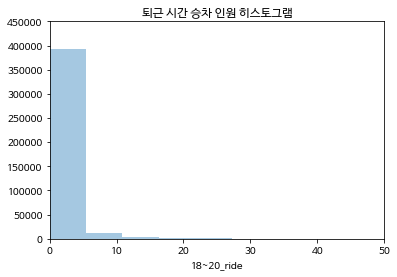

In [17]:
# 타깃 변수(퇴근 시간 승차 인원) 분포 시각화
sns.distplot(traindata['18~20_ride'], kde = False, bins = 50)
plt.axis([0, 50, 0, 450000]) # [x 축 최솟값, x 축 최댓값, y 축 최솟값, y 축 최댓값]
plt.title("퇴근 시간 승차 인원 히스토그램") # 그래프 제목 지정
plt.show() # 그래프 그리기

In [18]:
# 타깃 변수(퇴근 시간 승차 인원) 분포 확인
traindata.groupby('18~20_ride').size().head(6)

18~20_ride
0.0    296528
1.0     44268
2.0     23752
3.0     13560
4.0      8630
5.0      5911
dtype: int64

In [19]:
# 요일 변수 생성

# 날짜형으로 변환
traindata['date'] = pd.to_datetime(traindata['date'])
# 요일을 문자형으로 추출해 변수 생성
traindata['weekday'] = traindata['date'].dt.strftime('%a')

In [20]:
traindata

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,weekday
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sun
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Sun
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Sun
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,Sun
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mon
415419,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mon
415420,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Mon
415421,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mon


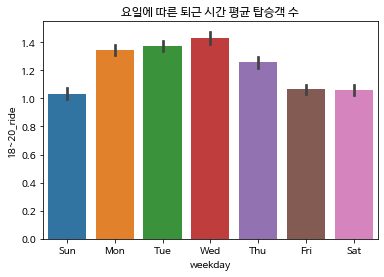

In [21]:
# 요일별 퇴근 시간 평균 탑승객 수 시각화
sns.barplot(x="weekday", y="18~20_ride", data=traindata)
plt.title("요일에 따른 퇴근 시간 평균 탑승객 수")
plt.show()

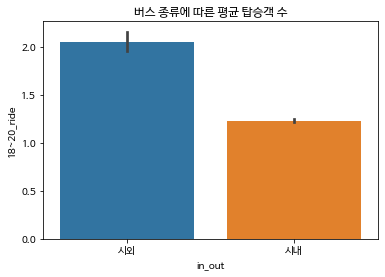

In [22]:
# 버스 종류별 퇴근 시간 평균 탑승객 수 시각화
sns.barplot(x="in_out", y="18~20_ride", data=traindata)
plt.title("버스 종류에 따른 평균 탑승객 수")
plt.show()

In [23]:
# 일별 출퇴근 시간의 총 승차 인원 데이터 생성
traindata['8~10_ride'] = traindata['8~9_ride'] + traindata['9~10_ride']

# 인덱스를 다시 처음부터 재배열
# 기존의 인덱스는 첫번째열로 자동으로 삽입
eda_data = traindata.groupby('date')[['18~20_ride','8~10_ride']].agg('sum'
                                                                    ).reset_index()
                                                                    
# 상위 5개 행 확인
eda_data.head()

,date,18~20_ride,8~10_ride
0,2019-09-01,11537.0,11957.0
1,2019-09-02,20561.0,21844.0
2,2019-09-03,19743.0,25756.0
3,2019-09-04,20133.0,21472.0
4,2019-09-05,20392.0,26331.0


In [24]:
traindata.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,weekday,8~10_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sun,7.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Sun,6.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Sun,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,Sun,32.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sun,0.0


In [25]:
tt = traindata.groupby('date')[['18~20_ride','8~10_ride']].agg('sum')
tt

,18~20_ride,8~10_ride
date,,
2019-09-01,11537.0,11957.0
2019-09-02,20561.0,21844.0
2019-09-03,19743.0,25756.0
2019-09-04,20133.0,21472.0
2019-09-05,20392.0,26331.0
2019-09-06,8162.0,23455.0
2019-09-07,12389.0,9420.0
2019-09-08,10306.0,12118.0
2019-09-09,20135.0,24206.0


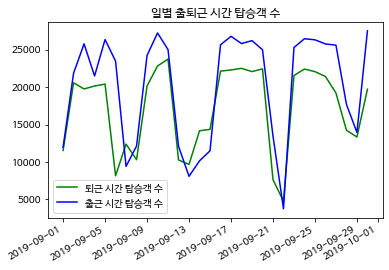

In [26]:
# 일별 출퇴근 시간 탑승객 수 시각화
plt.plot("date", "18~20_ride", "g-", label = "퇴근 시간 탑승객 수", data=eda_data)
plt.plot("date", "8~10_ride", "b-", label = "출근 시간 탑승객 수", data=eda_data)
plt.gcf().autofmt_xdate() # x축의 라벨이 서로 겹치지 않도록 설정
plt.legend(loc=0) # 그래프 상에서 최적의 위치에 범례 표시
plt.title("일별 출퇴근 시간 탑승객 수")   
plt.show()

# 데이터 전처리

In [27]:
# 월~수에는 퇴근 시간 평균 탑승객 수가 점차 증가하다가 목~일에 감소하는 추세
# 요일별 특성을 반영하기 위해 weekday 변수 생성

# 학습 데이터와 테스트 데이터를 구분하기 위한 변수 생성
train['cue'] = 0
test['cue'] = 1

# 학습 데이터와 테스트 데이터 통합
df = pd.concat([train, test], axis=0)

In [28]:
# datetime 변수형으로 변환
df['date'] = pd.to_datetime(df['date'])
# 요일 추출 (0-월요일~6-일요일)
df['weekday'] = df['date'].dt.weekday

In [29]:
df[['weekday']].head()

,weekday
0,6
1,6
2,6
3,6
4,6


In [30]:
index0 = df.query('weekday==0').index
index0

Int64Index([ 11538,  11539,  11540,  11541,  11542,  11543,  11544,  11545,
             11546,  11547,
            ...
            198250, 198251, 198252, 198253, 198254, 198255, 198256, 198257,
            198258, 198259],
           dtype='int64', length=109076)

In [31]:
df.iloc[index0]

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,cue,weekday
11538,11538,2019-09-02,4270000,시외,344,제주썬호텔,33.48990,126.49373,1.0,8.0,3.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
11539,11539,2019-09-02,4270000,시외,357,한라병원,33.48944,126.48508,1.0,3.0,1.0,2.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0,0
11540,11540,2019-09-02,4270000,시외,432,정존마을,33.48181,126.47352,0.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0,0
11541,11541,2019-09-02,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,12.0,17.0,21.0,19.0,16.0,0.0,0.0,0.0,0.0,0.0,2.0,62.0,0,0
11542,11542,2019-09-02,4270000,시내,1636,롯데호텔,33.24872,126.41032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198255,198255,2019-09-16,4280000,시내,2972,제주국제공항(종점),33.50571,126.49319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,21.0,11.0,20.0,15.0,0.0,0,0
198256,198256,2019-09-16,4280000,시내,3172,서복전시관,33.24519,126.57018,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0
198257,198257,2019-09-16,4280000,시내,4155,왕대왓,33.23434,126.48362,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
198258,198258,2019-09-16,7990000,시내,226,조천리,33.53578,126.63625,0.0,0.0,1.0,0.0,0.0,2.0,7.0,0.0,2.0,0.0,0.0,3.0,0.0,0,0


In [32]:
# 요일과 함께 해당 요일의 평균 탑승객 수 정보가 있다면 모델이 요일별 특성을 잘 학습할 것

# 요일별 평균 탑승 승객수를 구하는 함수
def week_mean() :
    # 전체 데이터에서 train 데이터에 해당하는 행 추출
    train_data = df.query('cue==0').reset_index(drop=True)
    
    # 일괄적으로 1의 값을 가지는 'weekdaymean'변수 생성
    df['weekdaymean'] = 1

    # 각 요일에 해당하는 인덱스 추출
    index0 = df.query('weekday==0').index
    index1 = df.query('weekday==1').index
    index2 = df.query('weekday==2').index
    index3 = df.query('weekday==3').index
    index4 = df.query('weekday==4').index
    index5 = df.query('weekday==5').index
    index6 = df.query('weekday==6').index

    # 인덱스를 활용하여 'weekdaymean'의 값을 각 요일에 맞는 평균 탑승 승객수로 변경 
    # -1은 열의 맨 끝
    # 왜 학습 데이터만 가지고 평균? 훈련 데이터에는 퇴근 시간 데이터가 없기 때문
    df.iloc[index0,-1] = train_data.query('weekday==0')['18~20_ride'].mean()
    df.iloc[index1,-1] = train_data.query('weekday==1')['18~20_ride'].mean()
    df.iloc[index2,-1] = train_data.query('weekday==2')['18~20_ride'].mean()
    df.iloc[index3,-1] = train_data.query('weekday==3')['18~20_ride'].mean()
    df.iloc[index4,-1] = train_data.query('weekday==4')['18~20_ride'].mean()
    df.iloc[index5,-1] = train_data.query('weekday==5')['18~20_ride'].mean()
    df.iloc[index6,-1] = train_data.query('weekday==6')['18~20_ride'].mean()
    
    return df

# 함수를 실행하여 변수 생성
df = week_mean()

In [33]:
df[['weekdaymean']].head()

,weekdaymean
0,1.034282
1,1.034282
2,1.034282
3,1.034282
4,1.034282


In [34]:
# 버스 종류별 평균 탑승객 수 특성을 반영시키기

# 버스 종류별 평균 탑승 승객수를 구하는 함수
def inout_mean() :
    # 전체 데이터에서 train 데이터에 해당하는 행 추출
    train_data = df.query('cue==0').reset_index(drop=True)
    
    # 일괄적으로 1의 값을 가지는 in_out_mean 변수 생성
    df['in_out_mean'] = 1

    # 버스 종류별 인덱스 추출
    in_index = df.query('in_out == "시내"').index # 시내버스
    out_index = df.query('in_out == "시외"').index # 시외버스

    # 인덱스를 활용하여 in_out_mean의 값을 각 버스 종류에 맞는 
    # 평균 탑승 승객수로 변경
    df.iloc[in_index,-1] = train_data.query('in_out == "시내"')['18~20_ride'].mean()
    df.iloc[out_index,-1] = train_data.query('in_out == "시외"')['18~20_ride'].mean()
    
    return df

# 함수를 실행하여 변수 생성
df = inout_mean()

In [35]:
df[['in_out_mean']].head()

,in_out_mean
0,2.044345
1,2.044345
2,2.044345
3,1.228499
4,1.228499


In [36]:
# 일별 출근 시간 탑승객 수와 퇴근 시간 탑승객 수가 비슷한 양상을 보임
# 따라서 일별 오전 시간대의 탑승객 수는 그날의 퇴근 시간 탑승객 수에 영향을 줄 것

# 날짜별 오전시간에 탑승한 총 승객수
f = df.groupby('date')['6~7_ride','7~8_ride','8~9_ride','9~10_ride','10~11_ride'
                    ].sum().reset_index()

# 변수명 바꾸기
f.columns=['date','6~7_ride_sum','7~8_ride_sum','8~9_ride_sum','9~10_ride_sum',
           '10~11_ride_sum']

# 기존의 데이터프레임에 새로운 변수를 병합
# pd.merge(left, right, on = 'col', how = 'left')
# 왼쪽 데이터프레임을 기준으로 조인한다. 오른쪽 데이터프레임에 없는 값은 NaN으로 나타난다.
df = pd.merge(df, f, how='left', on='date')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


In [37]:
f.head()

,date,6~7_ride_sum,7~8_ride_sum,8~9_ride_sum,9~10_ride_sum,10~11_ride_sum
0,2019-09-01,2942.0,4518.0,5682.0,6275.0,6774.0
1,2019-09-02,4915.0,13853.0,12266.0,9578.0,9444.0
2,2019-09-03,4991.0,15024.0,14844.0,10912.0,9439.0
3,2019-09-04,5206.0,14944.0,12620.0,8852.0,7947.0
4,2019-09-05,5152.0,15661.0,15049.0,11282.0,9833.0


## 도메인 조사를 통한 변수

In [38]:
# # 배차 간격이 짧을 수록 수요가 많은 버스일 것

# # 탑승 날짜를 datetime형으로 변환
# bts['geton_time2'] = pd.to_datetime(bts['geton_time'])

# # 탑승 날짜, 탑승 정류장 코드, 탑승 노선 번호 기준으로 정렬
# f = bts.sort_values(by=['geton_date','geton_station_code','bus_route_id',
#                         'geton_time2'],ascending=True).reset_index()

In [39]:
# # 반복문 실행 시간이 많이 소요되어 상태 진행률을 확인할 수 있는 tqdm 라이브러리 사용
# from tqdm import notebook

# # 시차를 넣기 위한 빈 리스트 생성
# interval_lst = []
# for i in notebook.tqdm(range(0,len(f)-1)):
#     # 탑승 날짜, 탑승 정류장 코드, 탑승 노선 번호가 같다면
#     if ((f.iloc[i].geton_date == f.iloc[i+1].geton_date) & 
#         (f.iloc[i].geton_station_code == f.iloc[i+1].geton_station_code) & 
#         (f.iloc[i].bus_route_id == f.iloc[i+1].bus_route_id)):
#         # 탑승 날짜의 차를 interval_lst에 넣기
#         interval_lst.append(f.iloc[i+1].geton_time2 - f.iloc[i].geton_time2)
#     else:
#        # 같지 않다면 0을 interval_lst에 넣기
#         interval_lst.append(0)

# interval_lst.insert(0, '0')

In [40]:
f.head()

,index,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count,geton_time2
0,396906,1.010010e+15,24000000,149793579,2019-09-01,06:25:08,1,국제여객선터미널,2019-09-01,06:37:17,324.0,관덕정,1,1,2022-04-06 06:25:08
1,413512,9.441160e+15,24010000,149793580,2019-09-01,06:43:52,1,국제여객선터미널,2019-09-01,07:14:23,3276.0,제주중앙여자고등학교(아라방면),1,1,2022-04-06 06:43:52
2,889943,1.010010e+15,24030000,149793696,2019-09-01,06:36:25,1,국제여객선터미널,2019-09-01,06:56:32,273.0,동광양,1,1,2022-04-06 06:36:25
3,902576,4.518421e+15,24030000,149793695,2019-09-01,08:32:57,1,국제여객선터미널,2019-09-01,08:51:45,273.0,동광양,1,1,2022-04-06 08:32:57
4,906479,4.655839e+15,24030000,149793805,2019-09-01,09:01:04,1,국제여객선터미널,2019-09-01,09:10:34,284.0,중앙로(국민은행),1,1,2022-04-06 09:01:04


In [41]:
# f['interval'] = interval_lst # interval_lst를 'interval'변수로 생성 
# # 'interval' 변수의 값을 문자형으로 변환 후 '시:분:초'의 형태로 변환
# f['interval'] = f['interval'].astype(str).str[7:].replace('','00:00:00')
## 따옴표로 감싸져서 만들어졌으므로 문자(string)입니다. 따라서 Data type은 object(문자)
# f['bus_route_id'] = f['bus_route_id'].astype(object)

In [42]:
# # 분으로 변환하는 함수
# def get_min(time_str):
#     h, m, s = time_str.split(':')
#     return (int(h) * 3600 + int(m) * 60 + int(s)) / 60
# # 'interval' 함수의 모든 값에 대해 함수 적용하여 나온 값을 time리스트에 넣기
# time = []
# for i in f['interval'] :
#     time.append(get_min(i))

# f['time'] = time # time리스트를 'time' 변수로 생성
# f['time'] = f['time'].astype(int) # 'time' 변수를 int 타입으로 변경
# f = f[f['time'] > 3] # 간격이 3분보다 작은 것 제외 
# f = f[f['time'] < 180] # 간격이 3시간보다 큰 것 제외

In [43]:
# # 버스 노선별 버스 간격의 평균 'bus_interval’변수 생성
# data = f.groupby('bus_route_id')['time'].agg([('bus_interval', 'mean')]
#                                             ).reset_index()
# data['bus_interval'] = data['bus_interval'].astype(int)

# # 변수 생성에 많은 시간이 소요되므로 csv 파일로 저장
# data.to_csv('bus_interval.csv', index = False)

In [44]:
# csv 파일이 성공적으로 저장됐다면 다음 과정부터 진행
import numpy as np
df['bus_route_id'] = df['bus_route_id'].astype(np.int64)
bus_interval = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bus_rush_hour/bus_interval.csv")

# 기존의 데이터프레임에 새로운 변수를 병합
df = pd.merge(df, bus_interval, how = 'left', on = 'bus_route_id')
# 배차 간격이 짧을 수록 수요가 많은 버스임을 의미하므로 결측치를 0으로 채우는 것이 아니라 9999로 변경
df['bus_interval'] = df['bus_interval'].fillna(9999) # 병합 중 생기는 NA값 처리

In [45]:
bus_interval

,bus_route_id,bus_interval
0,4270000,34
1,4280000,44
2,7990000,89
3,8170000,47
4,8180000,50
...,...,...
522,32730000,10
523,32760000,4
524,32790000,5
525,32810000,24


In [46]:
df[['bus_interval']].head()

,bus_interval
0,34.0
1,34.0
2,34.0
3,34.0
4,34.0


In [47]:
# 학교 근처는 수요가 많을 것

# school 변수 생성
# 정류장명에 '고등학교'가 포함되어 있는 행 뽑기 
highschool_station = df[df['station_name'].str.contains('고등학교')]
# '고등학교'가 포함되어 있는 정류장명을 중복 없이 리스트에 저장
highschool = list(highschool_station['station_name'].unique())
# 정류장명에 '대학교'가 포함되어 있는 행 뽑기
university_station = df[df['station_name'].str.contains('대학교')]
# '대학교'가 포함되어 있는 정류장명을 중복 없이 리스트에 저장
university = list(university_station['station_name'].unique())

# '고등학교'와 '대학교' 근처 정류장 구분 함수
def schoolstation(x):
    # highschool 리스트에 정류장명이 포함되어 있다면 1을 반환
    if x in highschool:
        return 1
    # university 리스트에 정류장명이 포함되어 있다면 1을 반환
    elif x in university:
        return 1
    # 둘 다 포함되지 않는 정류장명이라면 0을 반환
    else:
        return 0

# 모든 정류장명에 대해 적용
df['school'] = df['station_name'].apply(schoolstation)

In [48]:
df[['school']].head()

,school
0,0
1,0
2,0
3,0
4,0


In [49]:
# 환승 정류장은 수요가 많을 것

# school 변수와 동일한 방법으로 transfer 변수 생성
transfer_station = df[df['station_name'].str.contains('환승')]
transfers = list(transfer_station['station_name'].unique())

airport_station = df[df['station_name'].str.contains('공항')]
airport = list(airport_station['station_name'].unique())

terminal_station = df[df['station_name'].str.contains('터미널')]
terminal = list(terminal_station['station_name'].unique())

# 항상 수요가 많은 정류장 구분 함수
def transfer_station(x):
    if x in transfers:
        return 1
    elif x in airport:
        return 1
    elif x in terminal:
        return 1
    else:
        return 0

df['transfer'] = df['station_name'].apply(transfer_station)

In [50]:
airport_station

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,cue,weekday,weekdaymean,in_out_mean,6~7_ride_sum,7~8_ride_sum,8~9_ride_sum,9~10_ride_sum,10~11_ride_sum,bus_interval,school
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0,6,1.034282,1.228499,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0
55,55,2019-09-01,4280000,시내,2972,제주국제공항(종점),33.50571,126.49319,0.0,0.0,9.0,2.0,0.0,0.0,0.0,9.0,17.0,20.0,11.0,20.0,10.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0,44.0,0
65,65,2019-09-01,8170000,시내,3350,"제주국제공항(평화로, 800번)",33.50659,126.49288,0.0,0.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0,6,1.034282,1.228499,2942.0,4518.0,5682.0,6275.0,6774.0,47.0,0
74,74,2019-09-01,8180000,시내,2972,제주국제공항(종점),33.50571,126.49319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,7.0,11.0,0.0,0.0,0,6,1.034282,1.228499,2942.0,4518.0,5682.0,6275.0,6774.0,50.0,0
110,110,2019-09-01,21000000,시내,3351,"제주국제공항(일주동로,516도로)",33.50669,126.49335,0.0,6.0,7.0,7.0,6.0,22.0,0.0,0.0,0.0,0.0,0.0,2.0,42.0,0,6,1.034282,1.228499,2942.0,4518.0,5682.0,6275.0,6774.0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642329,642329,2019-10-16,31870000,시내,621,제주국제공항입구,33.50461,126.49647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,2.0,0.0,0.0,NaN,1,2,1.000000,1.000000,4771.0,14195.0,12602.0,9143.0,7757.0,78.0,0
642710,642710,2019-10-16,32310000,시내,638,제주국제공항(구제주방면),33.50661,126.49345,0.0,5.0,0.0,0.0,0.0,2.0,0.0,12.0,0.0,1.0,1.0,10.0,NaN,1,2,1.000000,1.000000,4771.0,14195.0,12602.0,9143.0,7757.0,58.0,0
642753,642753,2019-10-16,32320000,시내,1355,제주국제공항(신제주방면),33.50610,126.49275,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,NaN,1,2,1.000000,1.000000,4771.0,14195.0,12602.0,9143.0,7757.0,45.0,0
643292,643292,2019-10-16,32570000,시내,638,제주국제공항(구제주방면),33.50661,126.49345,0.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,2.0,3.0,NaN,1,2,1.000000,1.000000,4771.0,14195.0,12602.0,9143.0,7757.0,97.0,0


In [51]:
df[['transfer']].head()

,transfer
0,0
1,0
2,0
3,1
4,0


In [52]:
# 연휴 기간에는 퇴근 시간에 평소와 다른 수요 패턴이 나타날 것

# 날짜에서 연휴 구분 함수
def holiday(x):
    # 공휴일이라면 1을 반환
    if x in ['2019-09-12','2019-09-13','2019-09-14','2019-10-03','2019-10-09']:
        return 1
    else:
        # 공휴일이 아니라면 0을 반환
        return 0

    # 모든 날짜에 적용
df['holiday'] = df['date'].apply(holiday)
df[['holiday']].head()

,holiday
0,0
1,0
2,0
3,0
4,0


In [53]:
# 예측하려는 퇴근 시간대가 18~20시 2시간에 해당하는 승차인원을 예측하는 것
# 승하차 시간대 통합 변수(t~t+2)

# 오전 시간대에 2시간 동안 승차한 인원수의 합계
df['68a'] = df['6~7_ride'] + df['7~8_ride'] 
df['810a'] = df['8~9_ride'] + df['9~10_ride']
df['1012a'] = df['10~11_ride'] + df['11~12_ride']

# 오전 시간대에 2시간 동안 하차한 인원수의 합계
df['68b'] = df['6~7_takeoff'] + df['7~8_takeoff'] 
df['810b'] = df['8~9_takeoff'] + df['9~10_takeoff']
df['1012b'] = df['10~11_takeoff'] + df['11~12_takeoff']

In [54]:
df[['68a', '810a', '1012a', '68b', '810b', '1012b']].head()

,68a,810a,1012a,68b,810b,1012b
0,1.0,7.0,8.0,0.0,0.0,0.0
1,5.0,6.0,11.0,0.0,0.0,0.0
2,2.0,2.0,0.0,0.0,0.0,0.0
3,17.0,32.0,30.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
# 오전 시간에 승하차한 승객이 많다면 퇴근 시간 승차 인원도 증가할 것

# 오전 시간(6시~12시)에 승차한 승객 수의 합계
df['ride_sum'] = df[['6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', 
                     '10~11_ride', '11~12_ride']].sum(axis=1)

# 오전 시간(6시~12시)에 하차한 승객 수의 합계
df['takeoff_sum'] = df[['6~7_takeoff', '7~8_takeoff', '8~9_takeoff', '9~10_takeoff',
                        '10~11_takeoff', '11~12_takeoff']].sum(axis=1)

In [56]:
df[['ride_sum', 'takeoff_sum']].head()

,ride_sum,takeoff_sum
0,16.0,0.0
1,22.0,0.0
2,4.0,0.0
3,79.0,0.0
4,0.0,1.0


In [57]:
# 출퇴근 시간에 인기 있는 버스 노선이 존재. 
# 출근 시간 승차 인원이 많은 버스 노선은 퇴근 시간 또한 승차 인원이 많을 것
# 노선별 오전 시간대의 총 평균 탑승객 수 구하기

# 'bus_route_id'와 'station_code'를 결합해 route_station 생성
df['route_station'] = df['bus_route_id'].astype(str) + ',' \
                    + df['station_code'].astype(str)

# 버스노선별 오전시간의 총 승객수와 평균 승객수 구하기
data = df.groupby(['route_station'])['1012a'].agg({'sum', 'mean'}).reset_index()

# 변수명을 route_station, 1012a_mean, 1012a_sum으로 바꾸기
data.rename(columns = {'mean':'1012a_mean', 'sum':'1012a_sum'}, inplace=True)

# 기존의 데이터프레임에 새로운 변수를 병합
df = pd.merge(df, data, how='left', on='route_station')

In [58]:
data.head()

,route_station,1012a_mean,1012a_sum
0,"17010000,6000027",3.368421,128.0
1,"20010000,6115000",17.533333,789.0
2,"20010000,6115001",1.473684,56.0
3,"20010000,6115002",0.600000,12.0
4,"20010000,6115003",0.437500,14.0


In [59]:
df.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,cue,weekday,weekdaymean,in_out_mean,6~7_ride_sum,7~8_ride_sum,8~9_ride_sum,9~10_ride_sum,10~11_ride_sum,bus_interval,school,transfer,holiday,68a,810a,1012a,68b,810b,1012b,ride_sum,takeoff_sum,route_station,1012a_mean,1012a_sum
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,1.0,7.0,8.0,0.0,0.0,0.0,16.0,0.0,"4270000,344",5.304348,244.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,5.0,6.0,11.0,0.0,0.0,0.0,22.0,0.0,"4270000,357",11.608696,534.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,"4270000,432",2.304348,106.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0,6,1.034282,1.228499,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,1,0,17.0,32.0,30.0,0.0,0.0,0.0,79.0,0.0,"4270000,1579",36.673913,1687.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,6,1.034282,1.228499,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,"4270000,1646",0.564103,22.0


In [60]:
# 카테고리별 승객 수의 합과 비율 변수 추가

# 카테고리별 승객 수의 합
def category_people():
    # df와 병합을 위해 bus_route_id의 타입을 str로 변환
    bts['bus_route_id'] = bts['bus_route_id'].astype(str)

    # bus_route_id와 user_category별 승객 수의 합
    # agg(): 모든 열에 여러 함수를 매핑 
    f = bts.groupby(
        ['bus_route_id','user_category']
    )['user_count'].agg([('승객수', 'sum')]).reset_index()

    # bus_route_id별 user_category 변수의 승객수의 피벗 테이블 형태로 변환
    # 피벗테이블(pivot table): 데이터 열 중에서 두 개의 열을 각각 
    # 행 인덱스, 열 인덱스로 사용하여 데이터를 조회하여 펼쳐놓은 것
    g = pd.pivot_table(f, values='승객수', index='bus_route_id', 
                       columns='user_category', fill_value=0).reset_index()
    g.columns = ['bus_route_id', 'adult','kids','teen','elder','jang','jang2',
                 'ugong','ugong2']
    g = g[['bus_route_id', 'adult','kids','teen','elder']]

    # 기존의 데이터프레임에 새로운 변수를 병합
    merge_data = pd.merge(df, g, how='left', on='bus_route_id')
                 
    return merge_data

# bus_route_id의 타입을 str로 통일시켜준 뒤, 함수를 실행하여 변수 생성
# 왜 문자열로 변환?
df['bus_route_id'] = df['bus_route_id'].astype(str)
df = category_people()

In [61]:
bts.head()

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count,geton_time2
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1,2022-04-06 06:34:45
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1,2022-04-06 06:34:58
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1,2022-04-06 07:19:07
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1,2022-04-06 09:14:47
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1,2022-04-06 09:28:53


In [62]:
f = bts.groupby(
    ['bus_route_id','user_category']
)['user_count'].agg('sum').reset_index()
f.head()

,bus_route_id,user_category,user_count
0,17010000,1,160
1,20010000,1,1406
2,20010000,2,118
3,20010000,4,337
4,20010000,6,1212


In [63]:
f = bts.groupby(
    ['bus_route_id','user_category']
)['user_count'].agg(['sum']).reset_index()
f.head()

,bus_route_id,user_category,sum
0,17010000,1,160
1,20010000,1,1406
2,20010000,2,118
3,20010000,4,337
4,20010000,6,1212


In [64]:
f = bts.groupby(
    ['bus_route_id','user_category']
)['user_count'].agg([('승객수', 'sum')]).reset_index()
f.head()

,bus_route_id,user_category,승객수
0,17010000,1,160
1,20010000,1,1406
2,20010000,2,118
3,20010000,4,337
4,20010000,6,1212


In [65]:
g = pd.pivot_table(f, values='승객수', index='bus_route_id', 
                    columns='user_category', fill_value=0).reset_index()
g.head()        

user_category,bus_route_id,1,2,4,6,27,28,29,30
0,17010000,160,0,0,0,0,0,0,0
1,20010000,1406,118,337,1212,160,167,21,0
2,20020000,12,1,0,10,0,2,0,0
3,20040000,561,6,8,33,1,7,0,0
4,20050000,230,0,0,177,6,41,3,0


In [66]:
df.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,cue,weekday,weekdaymean,in_out_mean,6~7_ride_sum,7~8_ride_sum,8~9_ride_sum,9~10_ride_sum,10~11_ride_sum,bus_interval,school,transfer,holiday,68a,810a,1012a,68b,810b,1012b,ride_sum,takeoff_sum,route_station,1012a_mean,1012a_sum,adult,kids,teen,elder
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,1.0,7.0,8.0,0.0,0.0,0.0,16.0,0.0,"4270000,344",5.304348,244.0,8158.0,72.0,38.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,5.0,6.0,11.0,0.0,0.0,0.0,22.0,0.0,"4270000,357",11.608696,534.0,8158.0,72.0,38.0,0.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,"4270000,432",2.304348,106.0,8158.0,72.0,38.0,0.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0,6,1.034282,1.228499,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,1,0,17.0,32.0,30.0,0.0,0.0,0.0,79.0,0.0,"4270000,1579",36.673913,1687.0,8158.0,72.0,38.0,0.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,6,1.034282,1.228499,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,"4270000,1646",0.564103,22.0,8158.0,72.0,38.0,0.0


In [67]:
# 카테고리별 승객 비율
def category_people_ratio() :

    # bus_route_id별 user_category의 전체 합
    f_all = bts.groupby('bus_route_id'
                       )['user_count'].agg([('전체', 'sum')]).reset_index()

   # bus_route_id와 user_category별 승객 수의 합
    f_sum = bts.groupby(['bus_route_id','user_category']
                       )['user_count'].agg([('승객수', 'sum')]).reset_index()
    
    # 승객 수의 합을 전체 합으로 나눠줘 비율을 구함
    data = pd.merge(f_all, f_sum, on='bus_route_id')
    data['비율'] = data['승객수'] / data['전체']

   # 피벗 테이블을 통해 bus_route_id별 user_category변수의 승객 비율 형태로 변환
    data = pd.pivot_table(data, values='비율', index='bus_route_id', 
                          columns='user_category',fill_value=0).reset_index()
    data.columns = ['bus_route_id', 'adult_prop','kids_prop','teen_prop',
                    'elder_prop','jang_prop','jang2_prop','ugong_prop','ugong2_prop']
    f = data[['bus_route_id', 'adult_prop','kids_prop','teen_prop','elder_prop']]

    # 기존의 데이터프레임에 새로운 변수를 병합
    merge_data = pd.merge(df, f, how='left', on='bus_route_id')

    return merge_data

# 함수를 실행하여 변수 생성
df = category_people_ratio()

In [68]:
df.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,cue,weekday,weekdaymean,in_out_mean,6~7_ride_sum,7~8_ride_sum,8~9_ride_sum,9~10_ride_sum,10~11_ride_sum,bus_interval,school,transfer,holiday,68a,810a,1012a,68b,810b,1012b,ride_sum,takeoff_sum,route_station,1012a_mean,1012a_sum,adult,kids,teen,elder,adult_prop,kids_prop,teen_prop,elder_prop
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,1.0,7.0,8.0,0.0,0.0,0.0,16.0,0.0,"4270000,344",5.304348,244.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,5.0,6.0,11.0,0.0,0.0,0.0,22.0,0.0,"4270000,357",11.608696,534.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,"4270000,432",2.304348,106.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0,6,1.034282,1.228499,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,1,0,17.0,32.0,30.0,0.0,0.0,0.0,79.0,0.0,"4270000,1579",36.673913,1687.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,6,1.034282,1.228499,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,"4270000,1646",0.564103,22.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0


In [69]:
# 연속형 변수의 결측치를 평균값으로 처리할 수 있도록 SimpleImputer를 사용
from sklearn.impute import SimpleImputer  

# SimpleImputer를 사용할 변수 추출
na_col = ['adult', 'kids', 'teen', 'elder', 'adult_prop', 'kids_prop', 'teen_prop',
          'elder_prop']
# 평균값으로 결측치 처리를 위해 strategy옵션을 mean으로 설정 
imputer = SimpleImputer(strategy="mean")
# 각 변수에 대해 평균값을 구하고 결측치 대치를 위해 fit_transform을 사용
df[na_col] = pd.DataFrame(imputer.fit_transform(df[na_col]), columns = na_col)

In [70]:
# 좌표를 활용한 변수

import geopy.distance

coords_jejusi = (33.500770, 126.522761) # 제주시의 위도 경도
coords_seoquiposi = (33.259429, 126.558217) # 서귀포시의 위도 경도

# 제주시와의 거리
df['dis_jejusi'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejusi).km for i in range(len(df))]
# 서귀포시와의 거리
df['dis_seoquiposi'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_seoquiposi).km for i in range(len(df))]

In [71]:
df[['dis_jejusi', 'dis_seoquiposi']].head()

,dis_jejusi,dis_seoquiposi
0,2.954920,26.256744
1,3.720275,26.403025
2,5.036124,25.893305
3,2.864166,27.997494
4,29.040353,13.574693


In [72]:
# 승차 인원 상위 10개의 버스정류장 좌표
coords_jejusicheong1 = (33.49892, 126.53035) # 제주시청(광양 방면)의 위도 경도
coords_jejuairport = (33.50661, 126.49345) # 제주국제공항(구제주 방면)의 위도 경도
coords_hallahosp = (33.48963, 126.486) # 한라병원의 위도 경도
coords_rotary = (33.49143, 126.49678) # 제주도청신제주로터리의 위도 경도
coords_jejucenterhigh = (33.48902, 126.5392) # 제주중앙여자고등학교의 위도 경도
coords_jejumarket = (33.51315, 126.52706) # 동문시장의 위도 경도
coords_jejusclass = (33.47626, 126.48141) # 제주고등학교/중흥S클래스의 위도 경도
coords_centerroad = (33.51073, 126.5239) # 중앙로(국민은행)의 위도 경도
coords_fiveway = (33.48667, 126.48092) # 노형오거리의 위도 경도
coords_law = (33.49363, 126.53476) # 제주지방법원(광양 방면)의 위도 경도

# 승차 인원 상위 10개의 버스정류장 좌표와 각 정류장의 지구 표면에서 두 점 사이의 거리를 구함
df['dis_jejusicheong1'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejusicheong1).km for i in range(len(df))]
df['dis_jejuairport'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejuairport).km for i in range(len(df))]
df['dis_hallahosp'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_hallahosp).km for i in range(len(df))]
df['dis_rotary'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_rotary).km for i in range(len(df))]
df['dis_jejucenterhigh'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejucenterhigh).km for i in range(len(df))]
df['dis_jejumarket'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejumarket).km for i in range(len(df))]
df['dis_jejusclass'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejusclass).km for i in range(len(df))]
df['dis_centerroad'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_centerroad).km for i in range(len(df))]
df['dis_fiveway'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_fiveway).km for i in range(len(df))]
df['dis_law'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_law).km for i in range(len(df))]

In [73]:
df[['dis_jejusicheong1', 'dis_jejuairport', 'dis_hallahosp', 'dis_rotary',
    'dis_jejucenterhigh', 'dis_jejumarket', 'dis_jejusclass', 'dis_centerroad',
    'dis_fiveway', 'dis_law']].head()

,dis_jejusicheong1,dis_jejuairport,dis_hallahosp,dis_rotary,dis_jejucenterhigh,dis_jejumarket,dis_jejusclass,dis_centerroad,dis_fiveway,dis_law
0,3.547051,1.853545,0.719000,0.330360,4.226827,4.030090,1.897319,3.632769,1.243233,3.835351
1,4.336294,2.057088,0.088058,1.109489,5.029806,4.704476,1.501101,4.311404,0.493820,4.640172
2,5.611975,3.316057,1.448297,2.410695,6.156335,6.069228,0.957447,5.675079,0.873821,5.840420
3,3.596334,0.127071,1.889890,1.639020,4.718848,3.311940,3.432034,2.967079,2.376926,4.149595
4,29.106917,28.818039,26.819826,27.283840,28.424280,30.466215,25.277182,30.112554,26.384623,28.724248


In [74]:
# 버스정류장과 각 측정소의 거리

# 측정소별 위도, 경도
jeju = (33.51411, 126.52969) # 제주 측정소 근처
gosan = (33.29382, 126.16283) # 고산 측정소 근처
seongsan = (33.38677, 126.8802) # 성산 측정소 근처
po = (33.24616, 126.5653) # 서귀포 측정소 근처

# 버스정류장과 제주 측정소와의 거리
t1 = [geopy.distance.geodesic((i,j), jeju).km
      for i,j in list(zip(df['latitude'], df['longitude']))]
df['dis_jeju'] = t1

# 버스정류장과 고산 측정소와의 거리
t2 = [geopy.distance.geodesic((i,j), gosan).km
      for i,j in list(zip(df['latitude'], df['longitude']))]
df['dis_gosan']=t2

# 버스정류장과 성산 측정소와의 거리
t3 = [geopy.distance.geodesic((i,j), seongsan).km
      for i,j in list(zip(df['latitude'], df['longitude']))]
df['dis_seongsan']=t3

# 버스정류장과 서귀포 측정소와의 거리
t4 = [geopy.distance.geodesic((i,j), po).km
      for i,j in list(zip(df['latitude'], df['longitude']))]
df['dis_po']=t4

In [75]:
df[['dis_jeju', 'dis_gosan', 'dis_seongsan', 'dis_po']].head()

,dis_jeju,dis_gosan,dis_seongsan,dis_po
0,4.286659,37.692766,37.713630,27.841879
1,4.966848,37.008492,38.465822,27.996179
2,6.330746,35.642126,39.259820,27.496551
3,3.575272,38.643401,38.386802,29.579404
4,30.652098,23.648361,45.899140,14.269792


In [76]:
# 버스정류장과 가장 가까운 관측소
total = pd.DataFrame(list(zip(t1,t2,t3,t4)),
                     columns=['jeju', 'gosan', 'seongsan', 'po'])
df['dist_name'] = total.apply(lambda x: x.idxmin(), axis=1)

In [77]:
df[['dist_name']].head()

,dist_name
0,jeju
1,jeju
2,jeju
3,jeju
4,po


In [78]:
# 지점별 기상정보 변수

# 변수명 변경 
# ['지점', '일시', '기온(°C)', '강수량(mm)']
rain.columns = ['dist_name', 'date', 'temperature', 'rainfall']

# fillna 함수를 활용해 결측치를 0으로 치환
rain = rain.fillna(0)

# rain 데이터의 date 변수를 datetime 형태로 변환
rain['date'] = pd.to_datetime(rain['date'])

# 기존의 데이터프레임에 새로운 변수를 병합
df = pd.merge(df, rain, how='left', on=['dist_name', 'date'])

In [79]:
df.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,cue,weekday,weekdaymean,in_out_mean,6~7_ride_sum,7~8_ride_sum,8~9_ride_sum,9~10_ride_sum,10~11_ride_sum,bus_interval,school,transfer,holiday,68a,810a,1012a,68b,810b,1012b,ride_sum,takeoff_sum,route_station,1012a_mean,1012a_sum,adult,kids,teen,elder,adult_prop,kids_prop,teen_prop,elder_prop,dis_jejusi,dis_seoquiposi,dis_jejusicheong1,dis_jejuairport,dis_hallahosp,dis_rotary,dis_jejucenterhigh,dis_jejumarket,dis_jejusclass,dis_centerroad,dis_fiveway,dis_law,dis_jeju,dis_gosan,dis_seongsan,dis_po,dist_name,temperature,rainfall
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,1.0,7.0,8.0,0.0,0.0,0.0,16.0,0.0,"4270000,344",5.304348,244.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0,2.954920,26.256744,3.547051,1.853545,0.719000,0.330360,4.226827,4.030090,1.897319,3.632769,1.243233,3.835351,4.286659,37.692766,37.713630,27.841879,jeju,24.650000,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,5.0,6.0,11.0,0.0,0.0,0.0,22.0,0.0,"4270000,357",11.608696,534.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0,3.720275,26.403025,4.336294,2.057088,0.088058,1.109489,5.029806,4.704476,1.501101,4.311404,0.493820,4.640172,4.966848,37.008492,38.465822,27.996179,jeju,24.650000,0.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,"4270000,432",2.304348,106.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0,5.036124,25.893305,5.611975,3.316057,1.448297,2.410695,6.156335,6.069228,0.957447,5.675079,0.873821,5.840420,6.330746,35.642126,39.259820,27.496551,jeju,24.650000,0.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0,6,1.034282,1.228499,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,1,0,17.0,32.0,30.0,0.0,0.0,0.0,79.0,0.0,"4270000,1579",36.673913,1687.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0,2.864166,27.997494,3.596334,0.127071,1.889890,1.639020,4.718848,3.311940,3.432034,2.967079,2.376926,4.149595,3.575272,38.643401,38.386802,29.579404,jeju,24.650000,0.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,6,1.034282,1.228499,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,"4270000,1646",0.564103,22.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0,29.040353,13.574693,29.106917,28.818039,26.819826,27.283840,28.424280,30.466215,25.277182,30.112554,26.384623,28.724248,30.652098,23.648361,45.899140,14.269792,po,23.783333,0.0


In [80]:
# 비의 유무가 탑승객 수에 더 큰 영향을 줄 수 있음

# 비의 유무 나타내는 변수 생성
def is_rainy(x):
    if x == 0:
        return 0 # 비 안오는 날
    else:
        return 1 # 비 오는 날

df['rainy_day'] = df['rainfall'].apply(is_rainy)

In [84]:
df[['rainy_day']].head()

,rainy_day
0,0
1,0
2,0
3,0
4,0


In [86]:
# jeju_financial_life_data를 활용한 변수

# df 주소 데이터(df_location.csv) 로드
df_loc = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bus_rush_hour/df_location.csv", encoding='cp949')[['location','dong', 'si']]
# jeju_life 주소 데이터(life_location.csv) 로드
life_loc = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bus_rush_hour/life_location.csv", encoding='cp949'
                      )[['location','dong', 'si']]

# df의 위도, 경도 변수를 문자열로 취급하여 location 변수 생성
df['location'] = df['latitude'].astype(str) + ',' + df['longitude'].astype(str)
# jeju_life의 위도, 경도 변수를 문자열로 취급하여 location 변수 생성
jeju_life['location'] = jeju_life['y_axis'].astype(str).str[:10] + ',' + \
                        jeju_life['x_axis'].astype(str).str[:10]

# location 변수를 기준으로 df와 df_loc 병합
df = pd.merge(df, df_loc, how='left', on='location')
# location 변수를 기준으로 jeju_life와 life_loc 병합
jeju_life = pd.merge(jeju_life, life_loc, how='left', on='location')

In [87]:
df[['location', 'dong', 'si']].head()

,location,dong,si
0,"33.4899,126.49373",연동,제주시
1,"33.48944,126.48508",연동,제주시
2,"33.48181,126.47352",노형동,제주시
3,"33.50577,126.49252",용담이동,제주시
4,"33.255790000000005,126.4126",색달동,서귀포시


In [88]:
# 예측해야 할 퇴근 시간 승차인원은 해당 지역의 인구통계학적인 정보와 관련이 있을 수 있음

# 각 동(읍, 면별) 직업, 소득, 소비, 부동산 관련 변수의 평균, 합계, 비율

col = ['job_majorc', 'job_smallc', 'job_public', 'job_profession', 'job_self', 
       'avg_income', 'med_income', 'avg_spend', 'vehicle_own_rat']

# groupby 함수를 사용해 dong을 기준으로 위에서 선택한 변수들의 평균을 구함
data1 = jeju_life.groupby(['dong'])[col].mean().reset_index()
data1.columns=['dong','mean_job_majorc', 'mean_job_smallc', 'mean_job_public', 
               'mean_job_profession', 'mean_job_self', 'mean_vehicle_own_rat',
               'mean_avg_income', 'mean_med_income', 'mean_avg_spend']

# groupby 함수를 사용해 dong을 기준으로 위에서 선택한 변수들의 합계를 구함 
data2 = jeju_life.groupby(['dong'])[col].sum().reset_index()
data2.columns=['dong','sum_job_majorc', 'sum_job_smallc', 'sum_job_public', 
               'sum_job_profession', 'sum_job_self', 'sum_vehicle_own_rat', 
               'sum_avg_income', 'sum_med_income', 'sum_avg_spend']

# groupby 함수를 사용해 dong을 기준으로 위에서 선택한 변수들의 비율을 구함
data3 = (jeju_life.groupby(['dong'])[col].sum() \
             / jeju_life.groupby(['dong'])[col].sum().sum()).reset_index()
data3.columns = ['dong','rate_job_majorc', 'rate_job_smallc', 'rate_job_public', 
                 'rate_job_profession', 'rate_job_self', 'rate_vehicle_own_rat', 
                 'rate_avg_income', 'rate_med_income', 'rate_avg_spend']

# dong을 기준으로 기존의 데이터프레임에 새로운 변수를 병합
merge_data1 = pd.merge(data1, data2, how='left', on='dong')
merge_data2 = pd.merge(merge_data1, data3, how='left', on='dong')
df = pd.merge(df, merge_data2, how='left', on='dong')

In [89]:
df[['mean_job_majorc', 'mean_job_smallc', 'mean_job_public', 
    'mean_job_profession', 'mean_job_self', 'mean_vehicle_own_rat', 
    'mean_avg_income', 'mean_med_income', 'mean_avg_spend']].head()

,mean_job_majorc,mean_job_smallc,mean_job_public,mean_job_profession,mean_job_self,mean_vehicle_own_rat,mean_avg_income,mean_med_income,mean_avg_spend
0,0.030512,0.161997,0.039919,0.014888,0.138164,3.511182e+07,3.095374e+07,4.683326e+06,0.031514
1,0.030512,0.161997,0.039919,0.014888,0.138164,3.511182e+07,3.095374e+07,4.683326e+06,0.031514
2,0.032494,0.154253,0.042997,0.020755,0.139257,3.678985e+07,3.265628e+07,5.128032e+06,0.035210
3,0.025593,0.167158,0.035757,0.014249,0.135443,3.076244e+07,2.891900e+07,4.000557e+06,0.029785
4,0.035615,0.178596,0.019174,0.004394,0.305618,3.498224e+07,3.017862e+07,4.115050e+06,0.044791


In [90]:
df[['sum_job_majorc', 'sum_job_smallc', 'sum_job_public', 
    'sum_job_profession', 'sum_job_self', 'sum_vehicle_own_rat', 
    'sum_avg_income', 'sum_med_income', 'sum_avg_spend']].head()

,sum_job_majorc,sum_job_smallc,sum_job_public,sum_job_profession,sum_job_self,sum_vehicle_own_rat,sum_avg_income,sum_med_income,sum_avg_spend
0,18.948217,100.600402,24.789940,9.245359,85.799611,2.180444e+10,1.922227e+10,2.908346e+09,19.570112
1,18.948217,100.600402,24.789940,9.245359,85.799611,2.180444e+10,1.922227e+10,2.908346e+09,19.570112
2,19.918703,94.556852,26.357053,12.723008,85.364807,2.255218e+10,2.001830e+10,3.143484e+09,21.583853
3,6.244585,40.786531,8.724751,3.476796,33.048145,7.506035e+09,7.056235e+09,9.761358e+08,7.267512
4,1.032846,5.179291,0.556057,0.127439,8.862915,1.014485e+09,8.751800e+08,1.193365e+08,1.298941


In [91]:
df[['rate_job_majorc', 'rate_job_smallc', 'rate_job_public', 
    'rate_job_profession', 'rate_job_self', 'rate_vehicle_own_rat', 
    'rate_avg_income', 'rate_med_income', 'rate_avg_spend']].head()

,rate_job_majorc,rate_job_smallc,rate_job_public,rate_job_profession,rate_job_self,rate_vehicle_own_rat,rate_avg_income,rate_med_income,rate_avg_spend
0,0.070785,0.067234,0.072519,0.059186,0.039145,0.060589,0.059915,0.065706,0.048458
1,0.070785,0.067234,0.072519,0.059186,0.039145,0.060589,0.059915,0.065706,0.048458
2,0.074411,0.063195,0.077104,0.081449,0.038947,0.062667,0.062396,0.071018,0.053445
3,0.023328,0.027259,0.025523,0.022257,0.015078,0.020857,0.021994,0.022053,0.017995
4,0.003858,0.003461,0.001627,0.000816,0.004044,0.002819,0.002728,0.002696,0.003216


In [92]:
# 새로 생성한 27개의 변수 정보
df[merge_data2.columns[1:]].info() # 새로 생성한 27개 변수 각각 201개의 NA값이 존재

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643593 entries, 0 to 643592
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   mean_job_majorc       641868 non-null  float64
 1   mean_job_smallc       641868 non-null  float64
 2   mean_job_public       641868 non-null  float64
 3   mean_job_profession   641868 non-null  float64
 4   mean_job_self         641868 non-null  float64
 5   mean_vehicle_own_rat  641868 non-null  float64
 6   mean_avg_income       641868 non-null  float64
 7   mean_med_income       641868 non-null  float64
 8   mean_avg_spend        641868 non-null  float64
 9   sum_job_majorc        641868 non-null  float64
 10  sum_job_smallc        641868 non-null  float64
 11  sum_job_public        641868 non-null  float64
 12  sum_job_profession    641868 non-null  float64
 13  sum_job_self          641868 non-null  float64
 14  sum_vehicle_own_rat   641868 non-null  float64
 15  

In [93]:
# 결측치를 평균값으로 처리할 수 있도록 SimpleImputer를 사용
imputer = SimpleImputer(strategy="mean")

# 결측치가 존재하는 변수 목록
na_col = list(merge_data2.columns[1:])

# 각 변수에 대해 평균값을 구하고 결측치 대치를 위해 fit_transform을 사용
df[na_col] = pd.DataFrame(imputer.fit_transform(df[na_col]), columns = na_col)

In [94]:
# NA값 확인
df[na_col].isnull().sum()

mean_job_majorc         0
mean_job_smallc         0
mean_job_public         0
mean_job_profession     0
mean_job_self           0
mean_vehicle_own_rat    0
mean_avg_income         0
mean_med_income         0
mean_avg_spend          0
sum_job_majorc          0
sum_job_smallc          0
sum_job_public          0
sum_job_profession      0
sum_job_self            0
sum_vehicle_own_rat     0
sum_avg_income          0
sum_med_income          0
sum_avg_spend           0
rate_job_majorc         0
rate_job_smallc         0
rate_job_public         0
rate_job_profession     0
rate_job_self           0
rate_vehicle_own_rat    0
rate_avg_income         0
rate_med_income         0
rate_avg_spend          0
dtype: int64

In [95]:
# 승하차 시간대 통합 변수(t~t+3)

# 오전시간대에 3시간동안 승차한 인원수의 합계
df['69a'] = df['6~7_ride'] + df['7~8_ride'] + df['8~9_ride']
df['912a']= df['9~10_ride'] + df['10~11_ride'] + df['11~12_ride']

# 오전시간대에 3시간동안 하차한 인원수의 합계
df['69b'] = df['6~7_takeoff'] + df['7~8_takeoff'] + df['8~9_takeoff']
df['912b'] = df['9~10_takeoff'] + df['10~11_takeoff'] + df['11~12_takeoff']

In [96]:
df[['69a', '912a', '69b', '912b']].head()

,69a,912a,69b,912b
0,3.0,13.0,0.0,0.0
1,9.0,13.0,0.0,0.0
2,2.0,2.0,0.0,0.0
3,23.0,56.0,0.0,0.0
4,0.0,0.0,0.0,1.0


In [97]:
# 제주도 기상정보 변수

# 변수명 변경
# ['날짜', '현재일기', '현재기온', '체감온도', '일강수']
weather.columns = ['date','description','temp','feels_like','rain']
weather['rain'] = weather['rain'].replace(' ', '0')
weather['rain'] = weather['rain'].astype(float)
weather['date'] = pd.to_datetime(weather['date'])
df = pd.merge(df, weather, how='left', on='date')

In [98]:
df[['description', 'temp', 'feels_like', 'rain']].head()

,description,temp,feels_like,rain
0,흐림,26.2,75.0,0.0
1,흐림,26.2,75.0,0.0
2,흐림,26.2,75.0,0.0
3,흐림,26.2,75.0,0.0
4,흐림,26.2,75.0,0.0


In [99]:
# id별 퇴근 시간 총/평균 승객수

def id_statistic(ID, col1, col2) :
    
    train_data = df.query('cue==0').reset_index()    

    # mean, sum
    rs_mean = train_data.groupby([ID])['18~20_ride'].agg([(col1, 'mean')]
                                                        ).reset_index()
    rs_sum = train_data.groupby([ID])['18~20_ride'].agg([(col2, 'sum')]
                                                       ).reset_index()
    rs_mean_sum = pd.merge(rs_mean, rs_sum, on=ID)

    # merge
    merge_data = pd.merge(df, rs_mean_sum, how='left', on=ID)

    # 연속형 변수의 결측치를 평균값으로 대체
    merge_data[col1] = merge_data[col1].fillna(rs_mean[col1].mean())
    merge_data[col2] = merge_data[col2].fillna(rs_sum[col2].mean())
    
    return merge_data


df = id_statistic('bus_route_id', '1820_r_mean', '1820_r_sum')
df = id_statistic('station_code', '1820_s_mean', '1820_s_sum')
df = id_statistic('weekday', '1820_w_mean', '1820_w_sum')
df = id_statistic('route_station', '1820_rs_mean', '1820_rs_sum')

In [100]:
df[['1820_r_mean', '1820_r_sum', '1820_s_mean', '1820_s_sum',
   '1820_w_mean', '1820_w_sum', '1820_rs_mean', '1820_rs_sum']].head()

,1820_r_mean,1820_r_sum,1820_s_mean,1820_s_sum,1820_w_mean,1820_w_sum,1820_rs_mean,1820_rs_sum
0,3.104381,2409.0,1.466667,44.0,1.034282,54306.0,1.466667,44.0
1,3.104381,2409.0,4.178218,6330.0,1.034282,54306.0,5.366667,161.0
2,3.104381,2409.0,2.169559,1625.0,1.034282,54306.0,1.600000,48.0
3,3.104381,2409.0,52.032258,1613.0,1.034282,54306.0,53.766667,1613.0
4,3.104381,2409.0,0.732794,181.0,1.034282,54306.0,0.153846,4.0


In [107]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/bus_rush_hour/train_total.csv", index = None)

In [108]:
df_total = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bus_rush_hour/train_total.csv")

In [109]:
df_total.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,cue,weekday,weekdaymean,in_out_mean,6~7_ride_sum,7~8_ride_sum,8~9_ride_sum,9~10_ride_sum,10~11_ride_sum,bus_interval,school,transfer,holiday,68a,810a,1012a,68b,810b,1012b,ride_sum,takeoff_sum,route_station,1012a_mean,1012a_sum,adult,kids,teen,elder,adult_prop,kids_prop,teen_prop,elder_prop,dis_jejusi,dis_seoquiposi,dis_jejusicheong1,dis_jejuairport,dis_hallahosp,dis_rotary,dis_jejucenterhigh,dis_jejumarket,dis_jejusclass,dis_centerroad,dis_fiveway,dis_law,dis_jeju,dis_gosan,dis_seongsan,dis_po,dist_name,temperature,rainfall,rainy_day,location,dong,si,mean_job_majorc,mean_job_smallc,mean_job_public,mean_job_profession,mean_job_self,mean_vehicle_own_rat,mean_avg_income,mean_med_income,mean_avg_spend,sum_job_majorc,sum_job_smallc,sum_job_public,sum_job_profession,sum_job_self,sum_vehicle_own_rat,sum_avg_income,sum_med_income,sum_avg_spend,rate_job_majorc,rate_job_smallc,rate_job_public,rate_job_profession,rate_job_self,rate_vehicle_own_rat,rate_avg_income,rate_med_income,rate_avg_spend,69a,912a,69b,912b,description,temp,feels_like,rain,1820_r_mean,1820_r_sum,1820_s_mean,1820_s_sum,1820_w_mean,1820_w_sum,1820_rs_mean,1820_rs_sum
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,1.0,7.0,8.0,0.0,0.0,0.0,16.0,0.0,"4270000,344",5.304348,244.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0,2.954920,26.256744,3.547051,1.853545,0.719000,0.330360,4.226827,4.030090,1.897319,3.632769,1.243233,3.835351,4.286659,37.692766,37.713630,27.841879,jeju,24.650000,0.0,0,"33.4899,126.49373",연동,제주시,0.030512,0.161997,0.039919,0.014888,0.138164,3.511182e+07,3.095374e+07,4.683326e+06,0.031514,18.948217,100.600402,24.789940,9.245359,85.799611,2.180444e+10,1.922227e+10,2.908346e+09,19.570112,0.070785,0.067234,0.072519,0.059186,0.039145,0.060589,0.059915,0.065706,0.048458,3.0,13.0,0.0,0.0,흐림,26.2,75.0,0.0,3.104381,2409.0,1.466667,44.0,1.034282,54306.0,1.466667,44.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,5.0,6.0,11.0,0.0,0.0,0.0,22.0,0.0,"4270000,357",11.608696,534.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0,3.720275,26.403025,4.336294,2.057088,0.088058,1.109489,5.029806,4.704476,1.501101,4.311404,0.493820,4.640172,4.966848,37.008492,38.465822,27.996179,jeju,24.650000,0.0,0,"33.48944,126.48508",연동,제주시,0.030512,0.161997,0.039919,0.014888,0.138164,3.511182e+07,3.095374e+07,4.683326e+06,0.031514,18.948217,100.600402,24.789940,9.245359,85.799611,2.180444e+10,1.922227e+10,2.908346e+09,19.570112,0.070785,0.067234,0.072519,0.059186,0.039145,0.060589,0.059915,0.065706,0.048458,9.0,13.0,0.0,0.0,흐림,26.2,75.0,0.0,3.104381,2409.0,4.178218,6330.0,1.034282,54306.0,5.366667,161.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,"4270000,432",2.304348,106.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0,5.036124,25.893305,5.611975,3.316057,1.448297,2.410695,6.156335,6.069228,0.957447,5.675079,0.873821,5.840420,6.330746,35.642126,39.259820,27.496551,jeju,24.650000,0.0,0,"33.48181,126.47352",노형동,제주시,0.032494,0.154253,0.042997,0.020755,0.139257,3.678985e+07,3.265628e+07,5.128032e+06,0.035210,19.918703,94.556852,26.357053,12.723008,85.364807,2.255218e+10,2.001830e+10,3.143484e+09,21.583853,0.074411,0.063195,0.077104,0.081449,0.038947,0.062667,0.062396,0.071018,0.053445,2.0,2.0,0.0,0.0,흐림,26.2,75.0,0.0,3.104381,2409.0,2.169559,1625.0,1.034282,54306.0,1.600000,48.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0

In [106]:
df.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,cue,weekday,weekdaymean,in_out_mean,6~7_ride_sum,7~8_ride_sum,8~9_ride_sum,9~10_ride_sum,10~11_ride_sum,bus_interval,school,transfer,holiday,68a,810a,1012a,68b,810b,1012b,ride_sum,takeoff_sum,route_station,1012a_mean,1012a_sum,adult,kids,teen,elder,adult_prop,kids_prop,teen_prop,elder_prop,dis_jejusi,dis_seoquiposi,dis_jejusicheong1,dis_jejuairport,dis_hallahosp,dis_rotary,dis_jejucenterhigh,dis_jejumarket,dis_jejusclass,dis_centerroad,dis_fiveway,dis_law,dis_jeju,dis_gosan,dis_seongsan,dis_po,dist_name,temperature,rainfall,rainy_day,location,dong,si,mean_job_majorc,mean_job_smallc,mean_job_public,mean_job_profession,mean_job_self,mean_vehicle_own_rat,mean_avg_income,mean_med_income,mean_avg_spend,sum_job_majorc,sum_job_smallc,sum_job_public,sum_job_profession,sum_job_self,sum_vehicle_own_rat,sum_avg_income,sum_med_income,sum_avg_spend,rate_job_majorc,rate_job_smallc,rate_job_public,rate_job_profession,rate_job_self,rate_vehicle_own_rat,rate_avg_income,rate_med_income,rate_avg_spend,69a,912a,69b,912b,description,temp,feels_like,rain,1820_r_mean,1820_r_sum,1820_s_mean,1820_s_sum,1820_w_mean,1820_w_sum,1820_rs_mean,1820_rs_sum
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,1.0,7.0,8.0,0.0,0.0,0.0,16.0,0.0,"4270000,344",5.304348,244.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0,2.954920,26.256744,3.547051,1.853545,0.719000,0.330360,4.226827,4.030090,1.897319,3.632769,1.243233,3.835351,4.286659,37.692766,37.713630,27.841879,jeju,24.650000,0.0,0,"33.4899,126.49373",연동,제주시,0.030512,0.161997,0.039919,0.014888,0.138164,3.511182e+07,3.095374e+07,4.683326e+06,0.031514,18.948217,100.600402,24.789940,9.245359,85.799611,2.180444e+10,1.922227e+10,2.908346e+09,19.570112,0.070785,0.067234,0.072519,0.059186,0.039145,0.060589,0.059915,0.065706,0.048458,3.0,13.0,0.0,0.0,흐림,26.2,75.0,0.0,3.104381,2409.0,1.466667,44.0,1.034282,54306.0,1.466667,44.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,5.0,6.0,11.0,0.0,0.0,0.0,22.0,0.0,"4270000,357",11.608696,534.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0,3.720275,26.403025,4.336294,2.057088,0.088058,1.109489,5.029806,4.704476,1.501101,4.311404,0.493820,4.640172,4.966848,37.008492,38.465822,27.996179,jeju,24.650000,0.0,0,"33.48944,126.48508",연동,제주시,0.030512,0.161997,0.039919,0.014888,0.138164,3.511182e+07,3.095374e+07,4.683326e+06,0.031514,18.948217,100.600402,24.789940,9.245359,85.799611,2.180444e+10,1.922227e+10,2.908346e+09,19.570112,0.070785,0.067234,0.072519,0.059186,0.039145,0.060589,0.059915,0.065706,0.048458,9.0,13.0,0.0,0.0,흐림,26.2,75.0,0.0,3.104381,2409.0,4.178218,6330.0,1.034282,54306.0,5.366667,161.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,"4270000,432",2.304348,106.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0,5.036124,25.893305,5.611975,3.316057,1.448297,2.410695,6.156335,6.069228,0.957447,5.675079,0.873821,5.840420,6.330746,35.642126,39.259820,27.496551,jeju,24.650000,0.0,0,"33.48181,126.47352",노형동,제주시,0.032494,0.154253,0.042997,0.020755,0.139257,3.678985e+07,3.265628e+07,5.128032e+06,0.035210,19.918703,94.556852,26.357053,12.723008,85.364807,2.255218e+10,2.001830e+10,3.143484e+09,21.583853,0.074411,0.063195,0.077104,0.081449,0.038947,0.062667,0.062396,0.071018,0.053445,2.0,2.0,0.0,0.0,흐림,26.2,75.0,0.0,3.104381,2409.0,2.169559,1625.0,1.034282,54306.0,1.600000,48.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0